<a href="https://colab.research.google.com/github/Sanayaghimire/Data_Science/blob/main/covid_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks
# import plotly.express as px
# import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
data = pd.read_csv('/content/drive/MyDrive/Data_Science/corona_tested.csv')
data.head()

<ipython-input-83-44251d66b151>:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Data_Science/corona_tested.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [84]:
row,col = data.shape
print(row)
print(col)

278848
11


In [85]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [86]:
nan_indices = data.isna().any()
print(nan_indices)

Ind_ID                 False
Test_date              False
Cough_symptoms          True
Fever                   True
Sore_throat             True
Shortness_of_breath     True
Headache                True
Corona                 False
Age_60_above            True
Sex                     True
Known_contact          False
dtype: bool


        count
Fever        
False  256844
True    21752
[False True]


array([<Axes: ylabel='count'>], dtype=object)

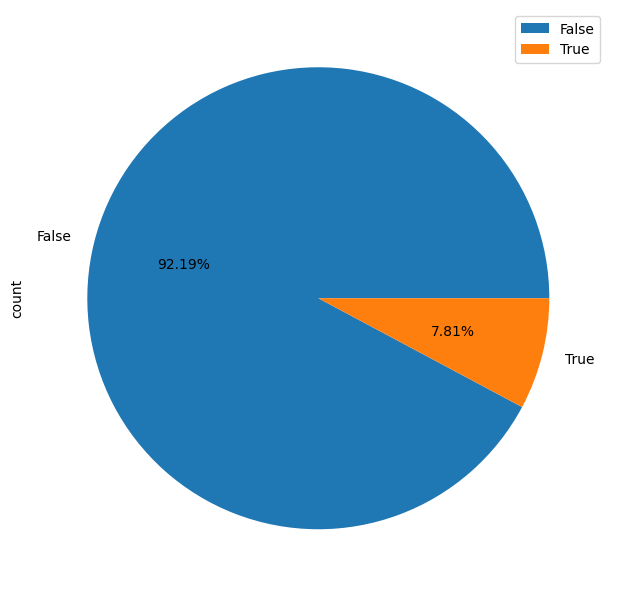

In [87]:
data_sym = pd.DataFrame(data['Fever'].value_counts())
print(data_sym)

print(data_sym.index.values)
data_sym.plot.pie(subplots=True,labels = data_sym.index.values, autopct='%1.2f%%', figsize = (15,7.5))

         Sore_throat
Corona              
negative    0.001406
other       0.008736
positive    0.103612


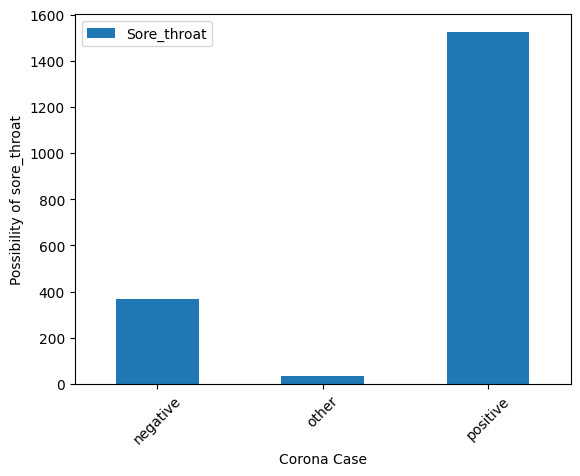

In [88]:
data[['Corona','Sore_throat']]
print(data[['Corona','Sore_throat']].groupby("Corona").mean())  # sum() can also be used

plt1 = data[['Corona','Sore_throat']].groupby("Corona").sum()
plt1.plot(kind='bar',legend = True,)
plt.xlabel("Corona Case")
plt.ylabel("Possibility of sore_throat")
xticks(rotation = 45)
plt.show()

   Fever Cough_symptoms  Headache
0  False       0.104153  0.004088
1   True       0.711462  0.062431


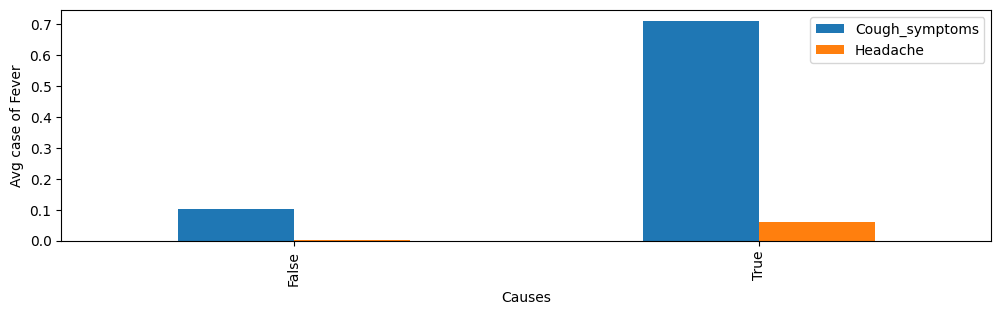

In [89]:

data_comp_avg_price = data[['Cough_symptoms','Headache', 'Fever']].groupby("Fever", as_index = False).mean()
print(data_comp_avg_price)

plt1 = data_comp_avg_price.plot(x = 'Fever', kind='bar',legend = True, figsize = (12,3))
plt.xlabel("Causes")
plt.ylabel("Avg case of Fever")
xticks(rotation = 90)
plt.show()

In [90]:
data_clean = data.dropna()
data = data_clean
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,False,False,False,False,negative,No,male,Abroad
13728,13729,22-03-2020,True,False,False,False,False,negative,No,female,Abroad
13730,13731,22-03-2020,True,True,False,False,False,positive,Yes,female,Other
13731,13732,22-03-2020,False,False,False,False,False,other,No,female,Other
13732,13733,22-03-2020,False,False,False,False,False,other,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,14-04-2020,True,False,True,False,False,negative,Yes,male,Abroad
156036,156037,14-04-2020,True,False,True,True,False,negative,No,male,Abroad
156037,156038,14-04-2020,True,True,False,False,False,negative,No,female,Abroad
156038,156039,14-04-2020,False,False,False,False,False,negative,No,male,Other


In [91]:
data.drop(columns=['Known_contact','Age_60_above', 'Sex','Test_date'], inplace = True)
print(data)

        Ind_ID Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache  \
13727    13728           True  False       False               False    False   
13728    13729           True  False       False               False    False   
13730    13731           True   True       False               False    False   
13731    13732          False  False       False               False    False   
13732    13733          False  False       False               False    False   
...        ...            ...    ...         ...                 ...      ...   
156035  156036           True  False        True               False    False   
156036  156037           True  False        True                True    False   
156037  156038           True   True       False               False    False   
156038  156039          False  False       False               False    False   
156039  156040          False  False       False               False    False   

          Corona  
13727   

In [92]:
data


,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
13727,13728,True,False,False,False,False,negative
13728,13729,True,False,False,False,False,negative
13730,13731,True,True,False,False,False,positive
13731,13732,False,False,False,False,False,other
13732,13733,False,False,False,False,False,other
...,...,...,...,...,...,...,...
156035,156036,True,False,True,False,False,negative
156036,156037,True,False,True,True,False,negative
156037,156038,True,True,False,False,False,negative
156038,156039,False,False,False,False,False,negative


In [93]:
print(data.columns)

Index(['Ind_ID', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona'],
      dtype='object')


<Figure size 1500x1500 with 0 Axes>

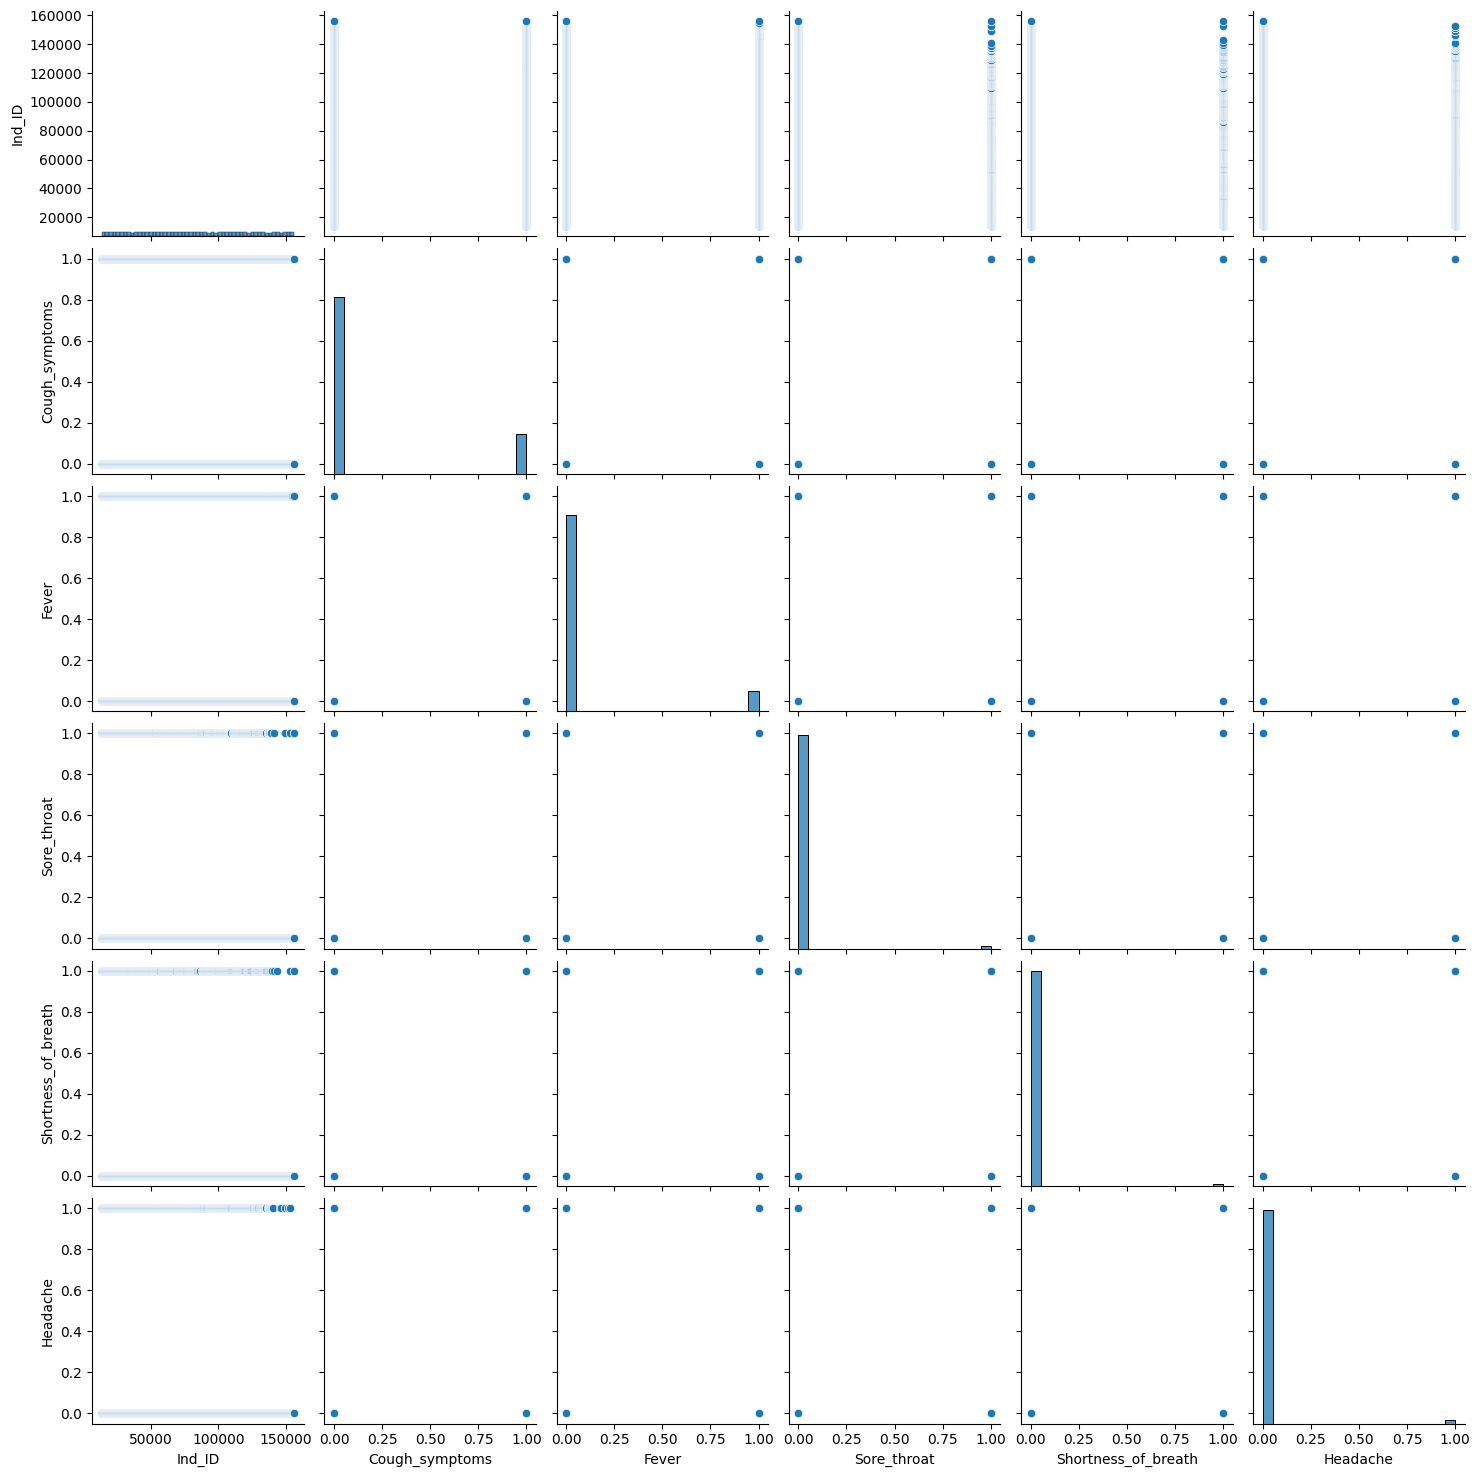

In [94]:
plt.figure(figsize=(15, 15))
sns.pairplot(data)
plt.show()

In [95]:
print(data['Sore_throat'].unique())
print(data['Shortness_of_breath'].unique())
print(data['Headache'].unique())
print(data)

[False True]
[False True]
[False True]
        Ind_ID Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache  \
13727    13728           True  False       False               False    False   
13728    13729           True  False       False               False    False   
13730    13731           True   True       False               False    False   
13731    13732          False  False       False               False    False   
13732    13733          False  False       False               False    False   
...        ...            ...    ...         ...                 ...      ...   
156035  156036           True  False        True               False    False   
156036  156037           True  False        True                True    False   
156037  156038           True   True       False               False    False   
156038  156039          False  False       False               False    False   
156039  156040          False  False       False               False  

In [96]:
data['Cough_symptoms'] = data['Cough_symptoms'].astype(int)
data['Fever'] = data['Fever'].astype(int)
data['Sore_throat'] = data['Sore_throat'].astype(int)
data['Shortness_of_breath'] = data['Shortness_of_breath'].astype(int)
data['Headache'] = data['Headache'].astype(int)
print(data)
print(data.dtypes)

        Ind_ID  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
13727    13728               1      0            0                    0   
13728    13729               1      0            0                    0   
13730    13731               1      1            0                    0   
13731    13732               0      0            0                    0   
13732    13733               0      0            0                    0   
...        ...             ...    ...          ...                  ...   
156035  156036               1      0            1                    0   
156036  156037               1      0            1                    1   
156037  156038               1      1            0                    0   
156038  156039               0      0            0                    0   
156039  156040               0      0            0                    0   

        Headache    Corona  
13727          0  negative  
13728          0  negative  
13730       

In [97]:
# data.loc[:, 'Fever'] = data['Fever'].astype(int)
# data.loc[:, 'Cough_symptoms'] = data['Cough_symptoms'].astype(int)
# data.loc[:, 'Sore_throat'] = data['Sore_throat'].astype(int)
# data.loc[:, 'Shortness_of_breath'] = data['Shortness_of_breath'].astype(int)
# data.loc[:, 'Headache'] = data['Headache'].astype(int)

# # data['Sore_throat'] = data['Sore_throat'].astype(int)
# # data['Shortness_of_breath'] = data['Shortness_of_breath'].astype(int)
# # data['Headache'] = data['Headache'].astype(int)
# # data['Corona'] = data['Corona'].replace('negative', -1)
# print(data)
# print(data.dtypes)

In [98]:
data.describe()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache
count,138172.000000,138172.000000,138172.000000,138172.000000,138172.000000,138172.000000
mean,84638.286520,0.182114,0.093015,0.010827,0.007831,0.015191
std,41003.803213,0.385940,0.290454,0.103489,0.088145,0.122313
min,13728.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49278.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,84373.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,119978.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,156040.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
select_col = ['Ind_ID']

In [100]:
select_col_df = data[['Ind_ID']]
select_col_df = select_col_df.describe()
select_col_df

,Ind_ID
count,138172.000000
mean,84638.286520
std,41003.803213
min,13728.000000
25%,49278.750000
50%,84373.500000
75%,119978.250000
max,156040.000000


In [101]:
mean_value = select_col_df.iloc[1:2,:]
mean_value

,Ind_ID
mean,84638.28652


In [102]:
mean_value = select_col_df.iloc[1:2,:].values[0]
mean_value

array([84638.2865197])

In [103]:
df_filtered = df[df['corona'] != 'other']
print("\nFiltered DataFrame:")
print(df_filtered)


Filtered DataFrame:
     corona  value
0  positive      1
1  negative      2
3  positive      4


In [104]:
data

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
13727,13728,1,0,0,0,0,negative
13728,13729,1,0,0,0,0,negative
13730,13731,1,1,0,0,0,positive
13731,13732,0,0,0,0,0,other
13732,13733,0,0,0,0,0,other
...,...,...,...,...,...,...,...
156035,156036,1,0,1,0,0,negative
156036,156037,1,0,1,1,0,negative
156037,156038,1,1,0,0,0,negative
156038,156039,0,0,0,0,0,negative


In [105]:
data_counts = data['Corona'].value_counts()
non_diab = data[data['Corona'] == 0].iloc[0:268]
daib = data[data['Corona'] == 1]
data1 = pd.concat([non_diab,daib]).sample(frac = 1)
data1['Corona'].value_counts()

Series([], Name: count, dtype: int64)

In [106]:
data.describe()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache
count,138172.000000,138172.000000,138172.000000,138172.000000,138172.000000,138172.000000
mean,84638.286520,0.182114,0.093015,0.010827,0.007831,0.015191
std,41003.803213,0.385940,0.290454,0.103489,0.088145,0.122313
min,13728.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49278.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,84373.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,119978.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,156040.000000,1.000000,1.000000,1.000000,1.000000,1.000000


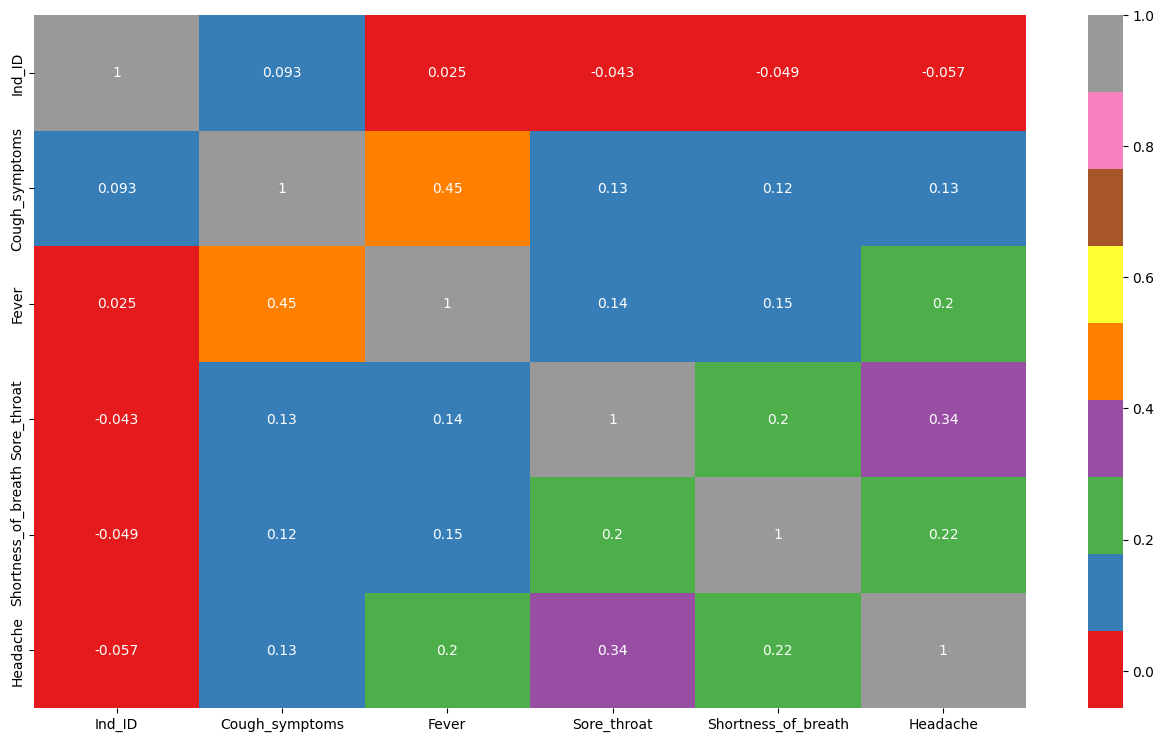

In [107]:
plt.figure(figsize=(16,9))
corr = data[data.describe().columns].corr()
sns.heatmap(corr, annot=True, cmap='Set1')
plt.show()


In [108]:
# training and normalization of data
X = data.iloc[:,:6].values
Y = data.iloc[:,6:].values


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [109]:
# # Fitting Linear Regression to the dataset
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X_train,Y_train)

In [110]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=8, max_iter=800)
model.fit(X_train,Y_train)
prediction = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
test_data = data.iloc[101:102]
output = test_data['Corona']
test_data.drop(['Corona'], axis = 1, inplace = True)
print("Predicted output = ",model.predict(test_data)[0])
print("Actual Output = ", output.values[0])

Predicted output =  negative
Actual Output =  negative


<ipython-input-111-d74b3d8b4845>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['Corona'], axis = 1, inplace = True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


In [112]:
print("The train accuracy score = ",round(model.score(X_train,Y_train)*100,2))
print("The test accuracy score = ",round(model.score(X_test,Y_test)*100,2))

The train accuracy score =  91.0
The test accuracy score =  90.75


In [113]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(Y_test,prediction)
print(conf_matrix)

[[25078     0     0]
 [  355     0     0]
 [ 2202     0     0]]


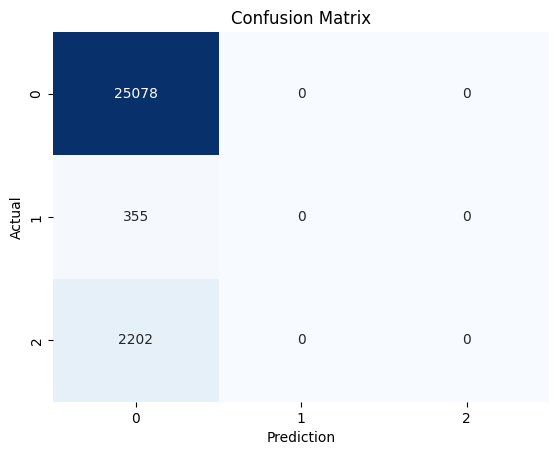

In [114]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [115]:
print(classification_report(Y_test,prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.91      1.00      0.95     25078
       other       0.00      0.00      0.00       355
    positive       0.00      0.00      0.00      2202

    accuracy                           0.91     27635
   macro avg       0.30      0.33      0.32     27635
weighted avg       0.82      0.91      0.86     27635



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
